In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("programmer3/cloud-resource-usage-dataset-for-anomaly-detection")

print("Path to dataset files:", path)


100%|██████████| 193k/193k [00:00<00:00, 976kB/s]

Extracting files...
Path to dataset files: /Users/sebastiangomba/.cache/kagglehub/datasets/programmer3/cloud-resource-usage-dataset-for-anomaly-detection/versions/1


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("cloud_dataset.csv")
df.head()

,Timestamp,CPU_Usage,Memory_Usage,Disk_IO,Network_IO,Workload_Type,User_ID,Anomaly_Label
0,2025-07-01 00:00:00,18.88,43.19,11.40,6.01,Database_Query,user_1,0
1,2025-07-01 00:01:00,25.31,45.43,7.68,17.67,Video_Streaming,user_1,0
2,2025-07-01 00:02:00,3.87,49.50,14.08,3.48,Database_Query,user_1,0
3,2025-07-01 00:03:00,20.92,25.88,17.33,4.77,Web_Service,user_1,0
4,2025-07-01 00:04:00,55.59,43.94,10.61,4.48,Web_Service,user_1,0


In [41]:
print(df.isnull().sum())

Timestamp        0
CPU_Usage        0
Memory_Usage     0
Disk_IO          0
Network_IO       0
Workload_Type    0
User_ID          0
Anomaly_Label    0
dtype: int64


No hay valores nulos

In [42]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


No hay valores duplicados

In [ ]:
df["Anomaly_Label"].value_counts()

Anomaly_Label
0    13143
1     1257
Name: count, dtype: int64

/var/folders/_6/34dbwvsn61d76rmnh8fr7t5r0000gn/T/ipykernel_63759/3368198268.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.set_index('Timestamp').resample('6H').mean(numeric_only=True)


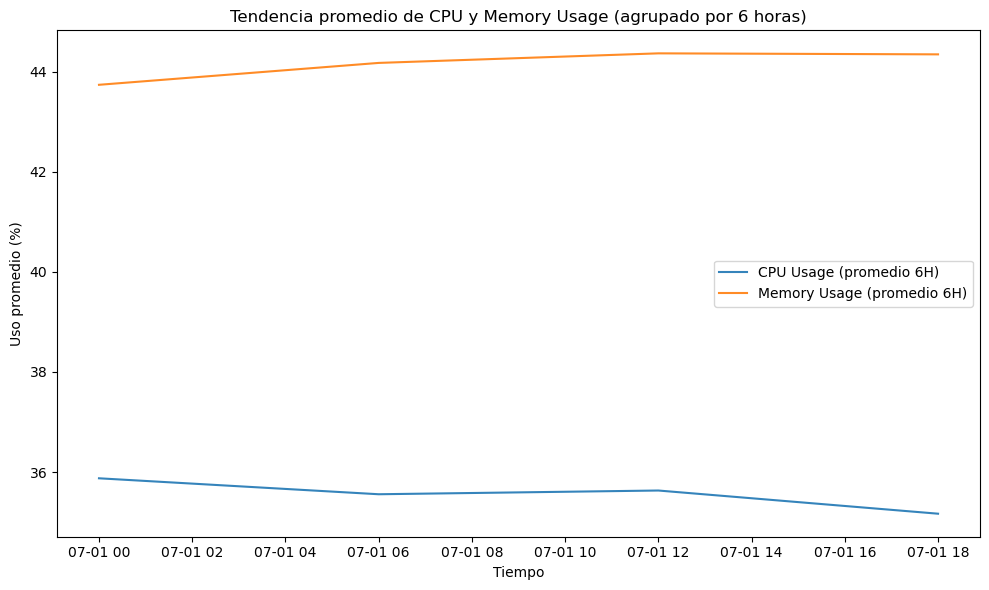

In [52]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])

# Reindexar y agrupar por intervalos de 6 horas
df_resampled = df.set_index('Timestamp').resample('6H').mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(df_resampled.index, df_resampled['CPU_Usage'], label='CPU Usage (promedio 6H)', alpha=0.9)
plt.plot(df_resampled.index, df_resampled['Memory_Usage'], label='Memory Usage (promedio 6H)', alpha=0.9)

plt.title('Tendencia promedio de CPU y Memory Usage (agrupado por 6 horas)')
plt.xlabel('Tiempo')
plt.ylabel('Uso promedio (%)')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/_6/34dbwvsn61d76rmnh8fr7t5r0000gn/T/ipykernel_63759/3571504736.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.set_index('Timestamp').resample('6H').mean(numeric_only=True)


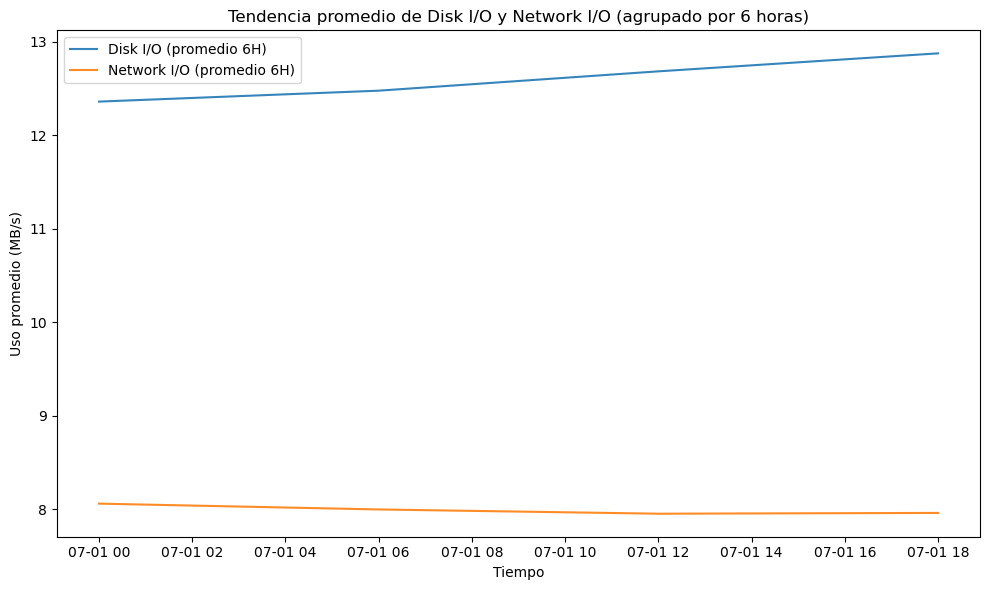

In [53]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df = df.dropna(subset=['Timestamp'])

# Reindexar y agrupar por intervalos de 6 horas
df_resampled = df.set_index('Timestamp').resample('6H').mean(numeric_only=True)

plt.figure(figsize=(10,6))
plt.plot(df_resampled.index, df_resampled['Disk_IO'], label='Disk I/O (promedio 6H)', alpha=0.9)
plt.plot(df_resampled.index, df_resampled['Network_IO'], label='Network I/O (promedio 6H)', alpha=0.9)

plt.title('Tendencia promedio de Disk I/O y Network I/O (agrupado por 6 horas)')
plt.xlabel('Tiempo')
plt.ylabel('Uso promedio (MB/s)')
plt.legend()
plt.tight_layout()
plt.show()

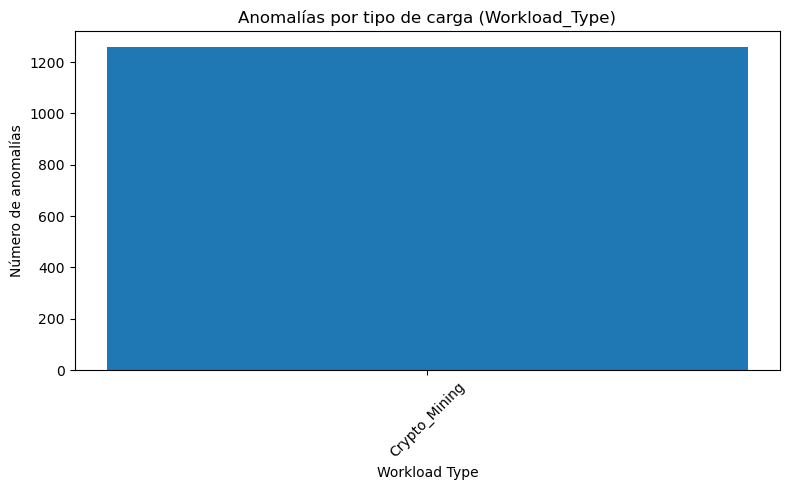

In [44]:

# Contar anomalías por tipo de carga
anomaly_counts = df[df['Anomaly_Label'] == 1]['Workload_Type'].value_counts()
# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(anomaly_counts.index, anomaly_counts.values)
plt.title("Anomalías por tipo de carga (Workload_Type)")
plt.xlabel("Workload Type")
plt.ylabel("Número de anomalías")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 😮

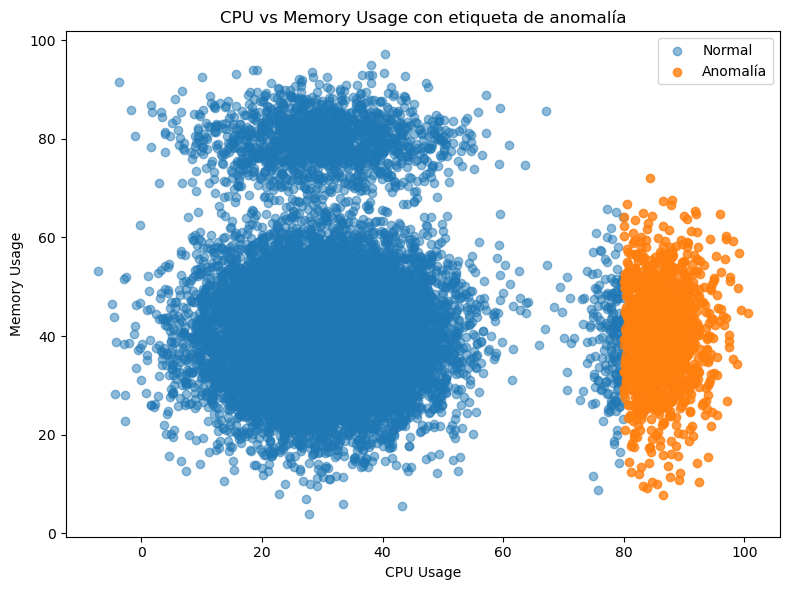

In [45]:
# Filtrar columnas necesarias
df_plot = df[['CPU_Usage', 'Memory_Usage', 'Anomaly_Label']].copy()

# Separar normales y anomalías
normal = df_plot[df_plot['Anomaly_Label'] == 0]
anomaly = df_plot[df_plot['Anomaly_Label'] == 1]

plt.figure(figsize=(8,6))

# Dispersión normales
plt.scatter(normal['CPU_Usage'], normal['Memory_Usage'], alpha=0.5, label='Normal')

# Dispersión anomalías
plt.scatter(anomaly['CPU_Usage'], anomaly['Memory_Usage'], alpha=0.8, label='Anomalía')

plt.xlabel('CPU Usage')
plt.ylabel('Memory Usage')
plt.title('CPU vs Memory Usage con etiqueta de anomalía')
plt.legend()
plt.tight_layout()
plt.show()

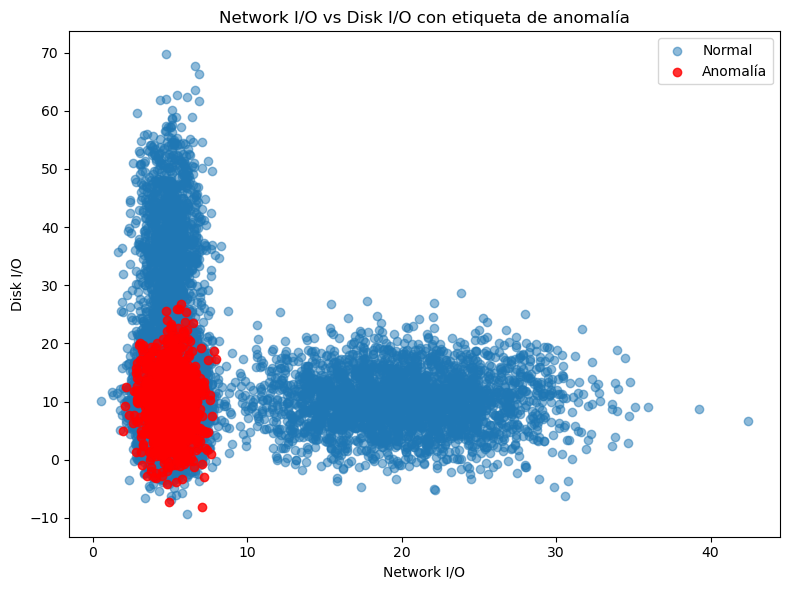

In [46]:
# Filtrar columnas necesarias
df_plot = df[['Network_IO', 'Disk_IO', 'Anomaly_Label']].copy()

# Separar normales y anomalías
normal = df_plot[df_plot['Anomaly_Label'] == 0]
anomaly = df_plot[df_plot['Anomaly_Label'] == 1]

plt.figure(figsize=(8,6))

# Dispersión normales
plt.scatter(normal['Network_IO'], normal['Disk_IO'], alpha=0.5, label='Normal')

# Dispersión anomalías
plt.scatter(anomaly['Network_IO'], anomaly['Disk_IO'], alpha=0.8, label='Anomalía', color='red')

plt.xlabel('Network I/O')
plt.ylabel('Disk I/O')
plt.title('Network I/O vs Disk I/O con etiqueta de anomalía')
plt.legend()
plt.tight_layout()
plt.show()

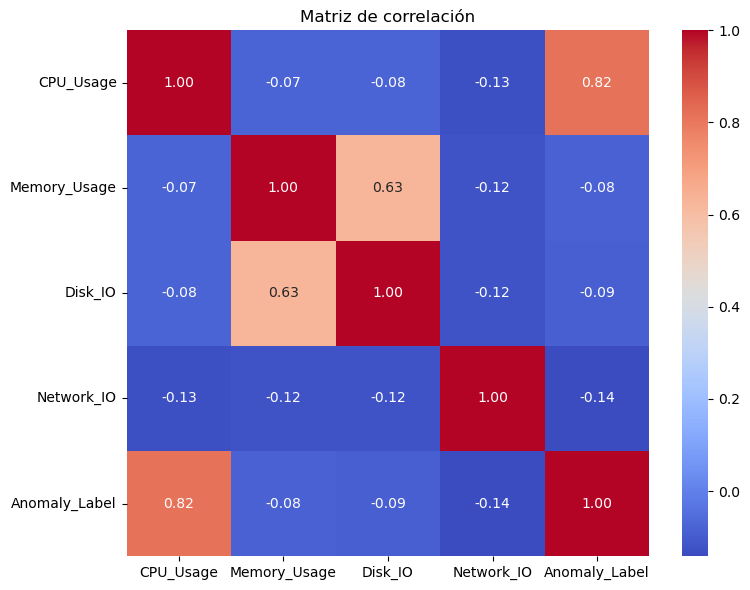

In [47]:


# Seleccionar solo columnas numéricas
corr = df[['CPU_Usage', 'Memory_Usage', 'Disk_IO', 'Network_IO', 'Anomaly_Label']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1. Preparar datos
X = df[['CPU_Usage', 'Memory_Usage', 'Disk_IO', 'Network_IO']]
y = df['Anomaly_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Modelos supervisados
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# 4. Entrenar y evaluar
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, prec, rec, f1))

# 5. Mostrar resultados
print("Resultados de evaluación:\n")
for name, acc, prec, rec, f1 in results:
    print(f"{name}: Accuracy={acc:.3f} | Precision={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")

# 6. Definir el mejor modelo
best_model = max(results, key=lambda x: x[4])  # se elige por F1
print(f"\nMejor modelo: {best_model[0]} con F1={best_model[4]:.3f}")

Resultados de evaluación:

Logistic Regression: Accuracy=0.996 | Precision=0.955 | Recall=1.000 | F1=0.977
Random Forest: Accuracy=1.000 | Precision=1.000 | Recall=1.000 | F1=1.000
SVM: Accuracy=0.995 | Precision=0.948 | Recall=1.000 | F1=0.973

Mejor modelo: Random Forest con F1=1.000


In [49]:
import pickle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Exportar el modelo entrenado
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)

print("Modelo Random Forest exportado como 'random_forest_model.pkl'")

Modelo Random Forest exportado como 'random_forest_model.pkl'
